In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import re

In [2]:
df = pd.read_csv('globalterrorismdb_0522dist.csv')

C:\Users\multi\AppData\Local\Temp\ipykernel_7492\4040701981.py:1: DtypeWarning: Columns (4,31,33,54,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('globalterrorismdb_0522dist.csv')


In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
import pandas as pd

df = df[[
    'iyear', 'imonth', 'iday', 'latitude', 'longitude',
    'nperps', 'nkill', 'nwound', 'nkillter', 'propextent', 'ransomamt',
    'doubtterr', 'vicinity', 'ishostkid', 'extended',
    'city', 'country', 'region', 'country_txt', 'region_txt',
    'attacktype1_txt', 'weaptype1_txt', 'targtype1_txt',
    'gname'
]]

df = df.rename(columns={
    'iyear': 'year',
    'imonth': 'month',
    'iday': 'day',
    'latitude': 'lat',
    'longitude': 'long',
    'propextent': 'damage'
})

df['country'] = df['country_txt']
df['region'] = df['region_txt']
df['attack'] = df['attacktype1_txt']
df['weapon'] = df['weaptype1_txt']
df['target'] = df['targtype1_txt']

df.drop(columns=['country_txt', 'region_txt', 'attacktype1_txt', 'weaptype1_txt', 'targtype1_txt'], inplace=True)

df['nkill'] = df['nkill'].clip(lower=0)
df['nwound'] = df['nwound'].clip(lower=0)
df['nkillter'] = df['nkillter'].clip(lower=0)
df['nperps'] = df['nperps'].apply(lambda x: 1 if x <= 0 else x)
df['ransomamt'] = df['ransomamt'].clip(lower=0)
df['damage'] = df['damage'].clip(lower=0)

for col in ['doubtterr', 'vicinity', 'ishostkid', 'extended']:
    df[col] = df[col].fillna(0)
    df[col] = df[col].apply(lambda x: 0 if x < 0 else x)

df = df.dropna(subset=['lat', 'long'])

df = df[(df['doubtterr'] == 0) & (df['year'] >= 2000) & (df['year'] <= 2020)]

df['attack'] = df['attack'].replace({
    'Facility/Infrastructure Attack': 'Infrastructure Attack',
    'Bombing/Explosion': 'Explosion',
    'Hostage Taking (Barricade Incident)': 'Hostage (Barricade)',
    'Hostage Taking (Kidnapping)': 'Hostage (Kidnapping)'
})
df['weapon'] = df['weapon'].replace({
    'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)': 'Vehicle'
})
df['target'] = df['target'].replace({
    'Government (General)': 'Government',
    'Private Citizens & Property': 'Private'
})
df['country'] = df['country'].replace({
    'Democratic Republic of the Congo': 'Congo'
})
df['gname'] = df['gname'].replace({
    'Islamic State of Iraq and the Levant (ISIL)': 'ISIL',
    'Al-Qaida in Iraq': 'Al-Qaida',
    'Al-Nusrah Front': 'Al-Nusrah',
    'Fulani extremists': 'Fulani',
    'Houthi extremists (Ansar Allah)': 'Ansar Allah',
    'Communist Party of India - Maoist (CPI-Maoist)': 'CPI - Maoist',
    'Tehrik-i-Taliban Pakistan (TTP)': 'TTP'
})

top_cities = df['city'].value_counts().head(50).index
df['city'] = df['city'].apply(lambda x: x if x in top_cities else 'Other')

top_groups = df['gname'].value_counts().head(30).index
df['gname'] = df['gname'].apply(lambda x: x if x in top_groups else 'Other')

for col in ['attack', 'weapon', 'target', 'country', 'region', 'gname', 'city']:
    df[col] = df[col].astype('category')

print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 114997 entries, 69833 to 209704
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   year       114997 non-null  int64   
 1   month      114997 non-null  int64   
 2   day        114997 non-null  int64   
 3   lat        114997 non-null  float64 
 4   long       114997 non-null  float64 
 5   nperps     105460 non-null  float64 
 6   nkill      110569 non-null  float64 
 7   nwound     106718 non-null  float64 
 8   nkillter   112857 non-null  float64 
 9   damage     48080 non-null   float64 
 10  ransomamt  691 non-null     float64 
 11  doubtterr  114997 non-null  int64   
 12  vicinity   114997 non-null  int64   
 13  ishostkid  114997 non-null  float64 
 14  extended   114997 non-null  int64   
 15  city       114997 non-null  category
 16  country    114997 non-null  category
 17  region     114997 non-null  category
 18  gname      114997 non-null  category
 19  att

In [5]:
df['nkill'] = df['nkill'].fillna(0)
df['nwound'] = df['nwound'].fillna(0)
df['nkillter'] = df['nkillter'].fillna(0)

In [6]:
df['nperps'] = df['nperps'].fillna(1)


In [7]:
df['damage'] = df['damage'].fillna(0)


In [8]:
df['ransomamt'] = df['ransomamt'].fillna(0)


In [9]:
df.isna().sum()

year         0
month        0
day          0
lat          0
long         0
nperps       0
nkill        0
nwound       0
nkillter     0
damage       0
ransomamt    0
doubtterr    0
vicinity     0
ishostkid    0
extended     0
city         0
country      0
region       0
gname        0
attack       0
weapon       0
target       0
dtype: int64

In [10]:
print(df['city'].unique())

['Other', 'Istanbul', 'Unknown', 'Srinagar', 'Athens', ..., 'Maiduguri', 'Arish', 'Aleppo', 'Taizz', 'Benghazi']
Length: 51
Categories (51, object): ['Abu Ghraib', 'Aden', 'Aleppo', 'Arish', ..., 'Tripoli', 'Tuz Khormato', 'Unknown', 'Yusufiyah']


In [11]:
rare_cities = df['city'].value_counts()
rare_cities[rare_cities < 50].count()

0

In [12]:
df.shape

(114997, 22)

In [13]:
df['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [14]:
df['lat'].unique()

array([-17.910812,  42.659809,  22.341896, ...,   2.805398,   0.852221,
        28.709444])

In [15]:
df.head()

,year,month,day,lat,long,nperps,nkill,nwound,nkillter,damage,...,vicinity,ishostkid,extended,city,country,region,gname,attack,weapon,target
69833,2000,1,1,-17.910812,19.988303,1.0,0.0,7.0,0.0,0.0,...,0,0.0,0,Other,Namibia,Sub-Saharan Africa,Other,Armed Assault,Firearms,Business
69834,2000,1,1,-17.910812,19.988303,1.0,0.0,7.0,0.0,0.0,...,0,1.0,1,Other,Namibia,Sub-Saharan Africa,Other,Hostage (Kidnapping),Firearms,Business
69836,2000,1,1,42.659809,20.307119,1.0,0.0,1.0,0.0,0.0,...,0,0.0,0,Other,Kosovo,Eastern Europe,Unknown,Explosion,Explosives,Private
69838,2000,1,1,22.341896,91.815117,1.0,0.0,0.0,0.0,4.0,...,0,0.0,0,Other,Bangladesh,South Asia,Unknown,Armed Assault,Explosives,Private
69839,2000,1,1,27.091373,95.023955,1.0,0.0,0.0,0.0,4.0,...,0,0.0,0,Other,India,South Asia,United Liberation Front of Assam (ULFA),Explosion,Explosives,Utilities


📅 Date-related
Column	Meaning
year (iyear)	Year of the attack
month (imonth)	Month of the attack
day (iday)	Day of the attack

🌍 Geographic
Column	Meaning
lat (latitude)	Latitude of the incident
long (longitude)	Longitude of the incident
country (country_txt)	Country where the incident occurred
region (region_txt)	Broader region (e.g., "Middle East & North Africa")
city	City where the incident occurred

🔢 Numerical
Column	Meaning
nperps	Number of perpetrators involved
nkill	Total number of people killed (including terrorists)
nwound	Number of people wounded
nkillter	Number of terrorists killed
ransomamt	Ransom amount (if any), in USD
damage (propextent)	Property damage extent:
1 = Less than $1M
2 = $1–10M
3 = More than $10M
4 = Unknown

⚙️ Binary (Yes/No) Features
Column	Meaning
doubtterr	Was the act doubted to be terrorism?
0 = No doubt, 1 = Some doubt
vicinity	Did the attack happen near but not in the city center?
extended	Did the incident last more than 24 hours?
ishostkid	Were hostages or kidnappings involved?

🧩 Categorical Descriptions
Column	Meaning
attack (attacktype1_txt)	Type of attack (e.g., "Bombing/Explosion", "Armed Assault")
weapon (weaptype1_txt)	Type of weapon used (e.g., "Explosives", "Firearms", "Vehicle")
target (targtype1_txt)	Target type (e.g., "Private Citizens", "Government", "Military")
gname	Name of the terrorist group (e.g., "ISIL", "Taliban")

C:\Users\multi\AppData\Local\Temp\ipykernel_7492\2668229414.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_df, y='city', x='incidents', palette='rocket', order=city_df.sort_values('incidents', ascending=False)['city'])


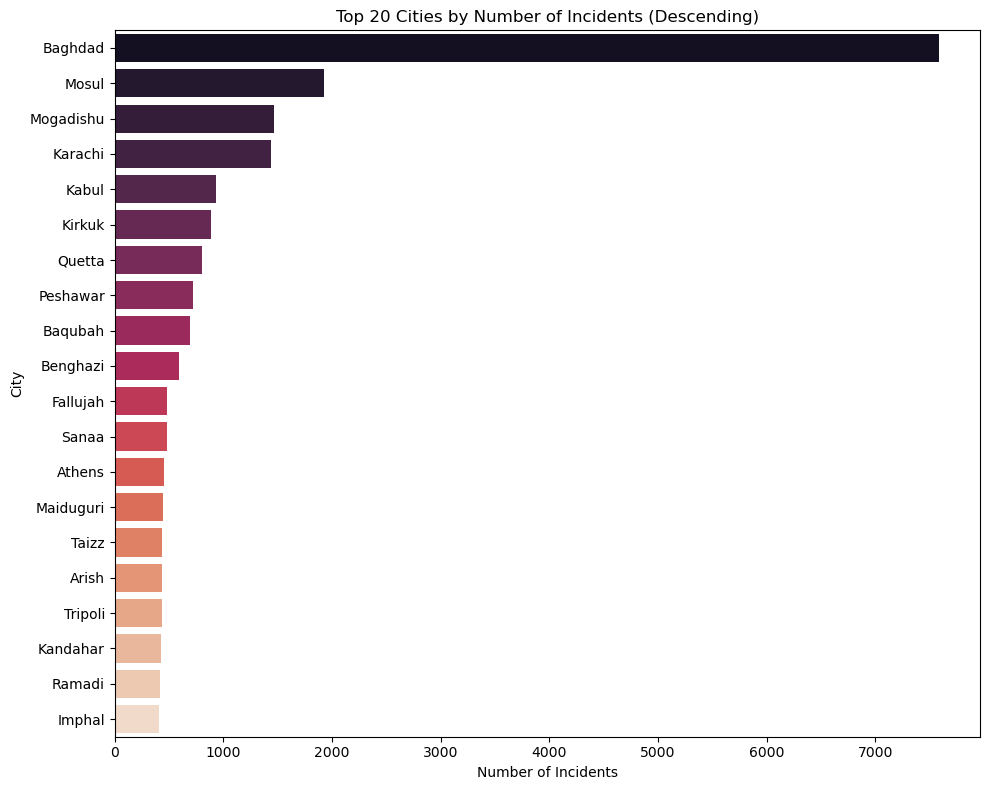

In [16]:
valid_cities = df['city'].dropna()
valid_cities = valid_cities[~valid_cities.isin(['Unknown', 'Other'])]

top_cities = valid_cities.value_counts().head(20)

city_df = top_cities.reset_index()
city_df.columns = ['city', 'incidents']

plt.figure(figsize=(10, 8))
sns.barplot(data=city_df, y='city', x='incidents', palette='rocket', order=city_df.sort_values('incidents', ascending=False)['city'])
plt.title("Top 20 Cities by Number of Incidents (Descending)")
plt.xlabel("Number of Incidents")
plt.ylabel("City")
plt.tight_layout()
plt.show()

In [17]:
df['city'].value_counts().head(3)

city
Other      82279
Baghdad     7583
Unknown     4044
Name: count, dtype: int64

In [18]:
df_real = df[~df['city'].isin(['Other', 'Unknown'])]


In [19]:
df_real['city'].value_counts().head(3)

city
Baghdad      7583
Mosul        1930
Mogadishu    1462
Name: count, dtype: int64

In [20]:
top3_cities = df_real['city'].value_counts().nlargest(3).index


In [21]:
df_top3 = df_real[df_real['city'].isin(top3_cities)]


In [22]:
df_top3 = df_top3.copy()
df_top3['city'] = df_top3['city'].cat.remove_unused_categories()


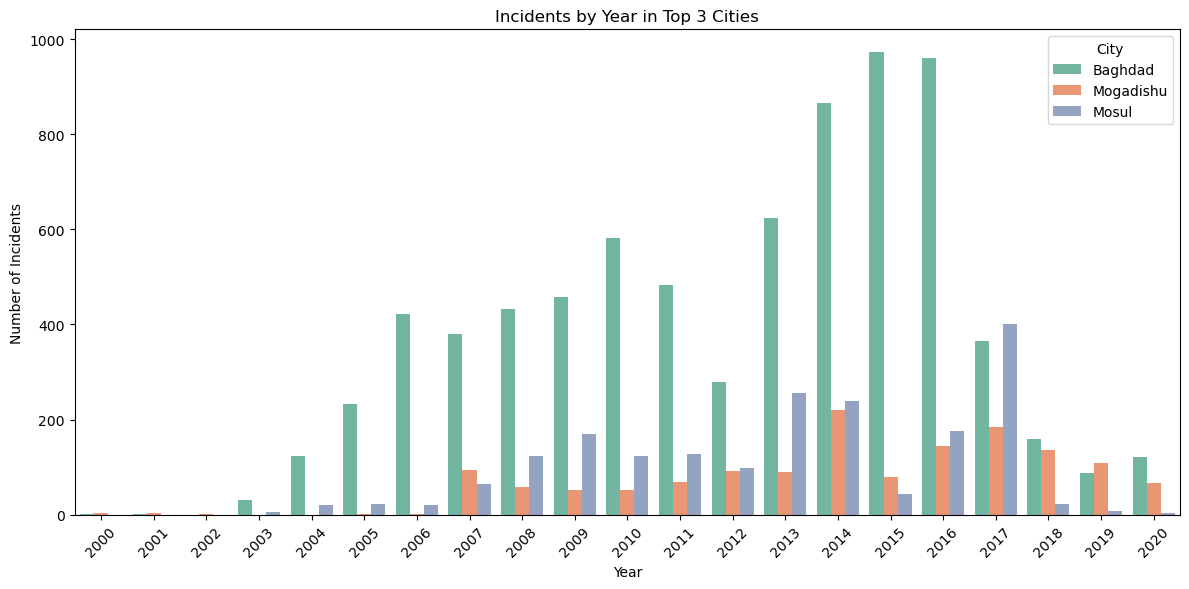

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top3, x='year', hue='city', palette='Set2')
plt.title("Incidents by Year in Top 3 Cities")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.legend(title="City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
df_top5 = df[df['city'].isin(['Baghdad', 'Mosul', 'Mogadishu'])].copy()

df_top5['city'] = df_top5['city'].cat.remove_unused_categories()

pivot = df_top5.pivot_table(
    index='city', columns='year', values='nkill', aggfunc='sum', fill_value=0
)

C:\Users\multi\AppData\Local\Temp\ipykernel_7492\3789969230.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_top5.pivot_table(


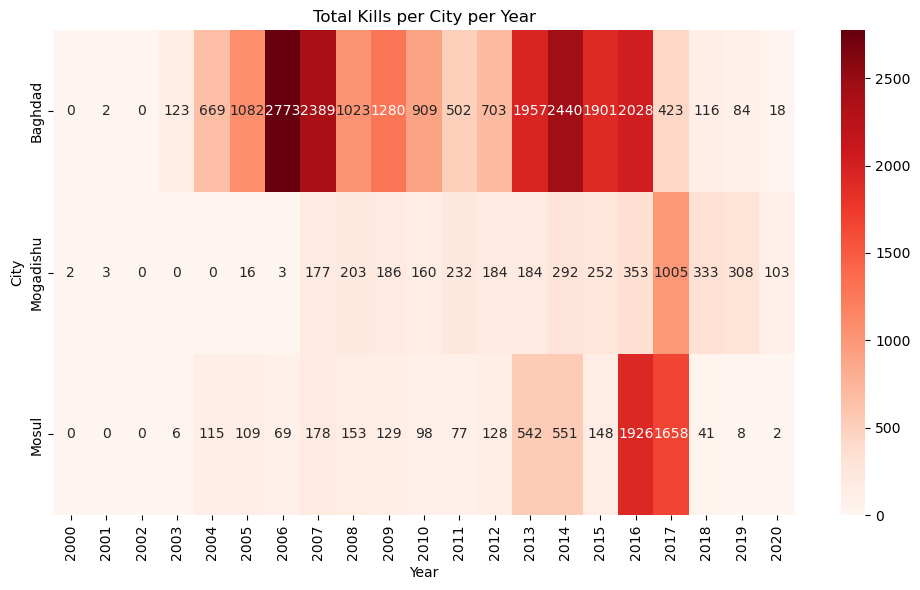

In [25]:

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap="Reds", annot=True, fmt=".0f")
plt.title("Total Kills per City per Year")
plt.ylabel("City")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

In [26]:
print(df['country'].dtype)


category


In [27]:
print(df['country'].cat.categories)


Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       ...
       'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza Strip', 'Western Sahara', 'Yemen', 'Yugoslavia',
       'Zambia', 'Zimbabwe'],
      dtype='object', length=167)


C:\Users\multi\AppData\Local\Temp\ipykernel_7492\1627875620.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('country')['nkill']
C:\Users\multi\AppData\Local\Temp\ipykernel_7492\1627875620.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=redeath, x='nkill', y='country', palette='Reds_r')


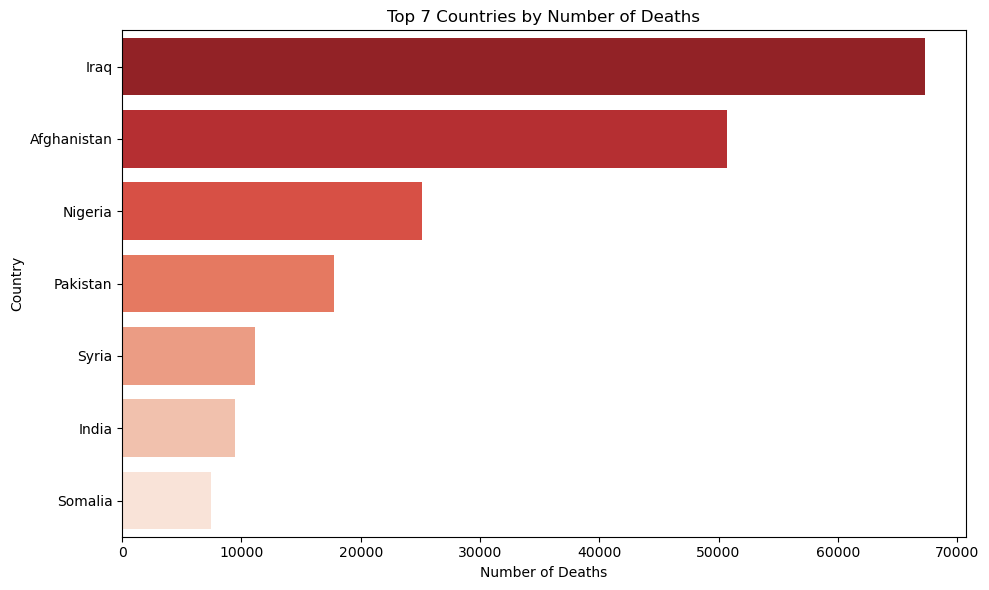

In [28]:
deaths_by_country = (
    df.groupby('country')['nkill']
    .sum()
    .sort_values(ascending=False)
    .head(7)
)

redeath = deaths_by_country.reset_index()
redeath.columns = ['country', 'nkill']  
redeath['country'] = redeath['country'].astype(str)


plt.figure(figsize=(10, 6))
sns.barplot(data=redeath, x='nkill', y='country', palette='Reds_r')
plt.title("Top 7 Countries by Number of Deaths")
plt.xlabel("Number of Deaths")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


C:\Users\multi\AppData\Local\Temp\ipykernel_7492\1935197123.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wounds_by_country = df.groupby('country')['nwound'].sum().sort_values(ascending=False).head(15)
C:\Users\multi\AppData\Local\Temp\ipykernel_7492\1935197123.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = rewound, y='country', x='nwound', palette='Oranges')


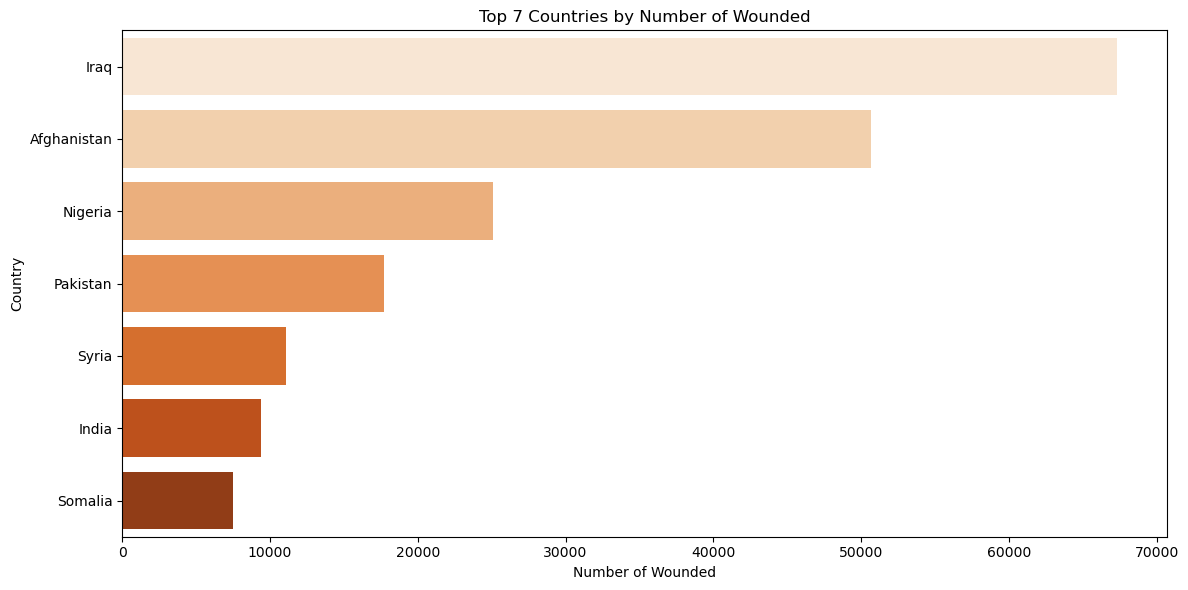

In [29]:
wounds_by_country = df.groupby('country')['nwound'].sum().sort_values(ascending=False).head(15)
rewound = deaths_by_country.reset_index()
rewound.columns = ['country', 'nwound'] 
rewound['country'] = rewound['country'].astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(data = rewound, y='country', x='nwound', palette='Oranges')
plt.title("Top 7 Countries by Number of Wounded")
plt.xlabel("Number of Wounded")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [30]:
df['nwound'].value_counts()

nwound
0.0      67645
1.0      11520
2.0       8002
3.0       5697
4.0       3841
         ...  
175.0        1
173.0        1
97.0         1
370.0        1
142.0        1
Name: count, Length: 213, dtype: int64

In [31]:
df['nkill'].value_counts()

nkill
0.0      58458
1.0      24632
2.0      10260
3.0       5539
4.0       3506
         ...  
122.0        1
158.0        1
117.0        1
107.0        1
222.0        1
Name: count, Length: 170, dtype: int64

In [32]:
df.columns

Index(['year', 'month', 'day', 'lat', 'long', 'nperps', 'nkill', 'nwound',
       'nkillter', 'damage', 'ransomamt', 'doubtterr', 'vicinity', 'ishostkid',
       'extended', 'city', 'country', 'region', 'gname', 'attack', 'weapon',
       'target'],
      dtype='object')

In [33]:
df.head()

,year,month,day,lat,long,nperps,nkill,nwound,nkillter,damage,...,vicinity,ishostkid,extended,city,country,region,gname,attack,weapon,target
69833,2000,1,1,-17.910812,19.988303,1.0,0.0,7.0,0.0,0.0,...,0,0.0,0,Other,Namibia,Sub-Saharan Africa,Other,Armed Assault,Firearms,Business
69834,2000,1,1,-17.910812,19.988303,1.0,0.0,7.0,0.0,0.0,...,0,1.0,1,Other,Namibia,Sub-Saharan Africa,Other,Hostage (Kidnapping),Firearms,Business
69836,2000,1,1,42.659809,20.307119,1.0,0.0,1.0,0.0,0.0,...,0,0.0,0,Other,Kosovo,Eastern Europe,Unknown,Explosion,Explosives,Private
69838,2000,1,1,22.341896,91.815117,1.0,0.0,0.0,0.0,4.0,...,0,0.0,0,Other,Bangladesh,South Asia,Unknown,Armed Assault,Explosives,Private
69839,2000,1,1,27.091373,95.023955,1.0,0.0,0.0,0.0,4.0,...,0,0.0,0,Other,India,South Asia,United Liberation Front of Assam (ULFA),Explosion,Explosives,Utilities


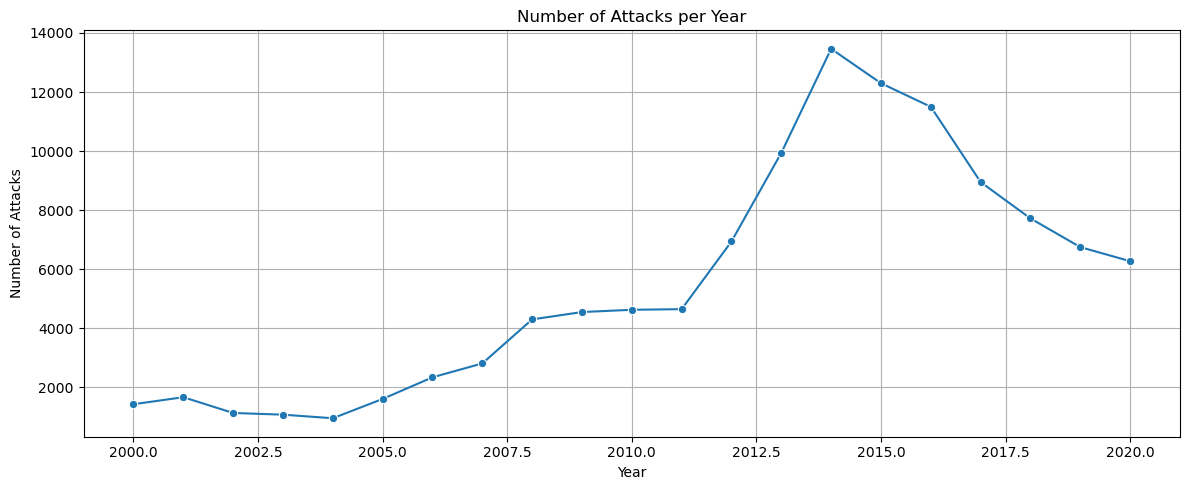

In [34]:
attacks_by_year = df.groupby('year').size()

plt.figure(figsize=(12, 5))
sns.lineplot(x=attacks_by_year.index, y=attacks_by_year.values, marker="o")
plt.title("Number of Attacks per Year")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\multi\AppData\Local\Temp\ipykernel_7492\2167127308.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weapon_counts.values, y=weapon_counts.index, palette='Blues_r')


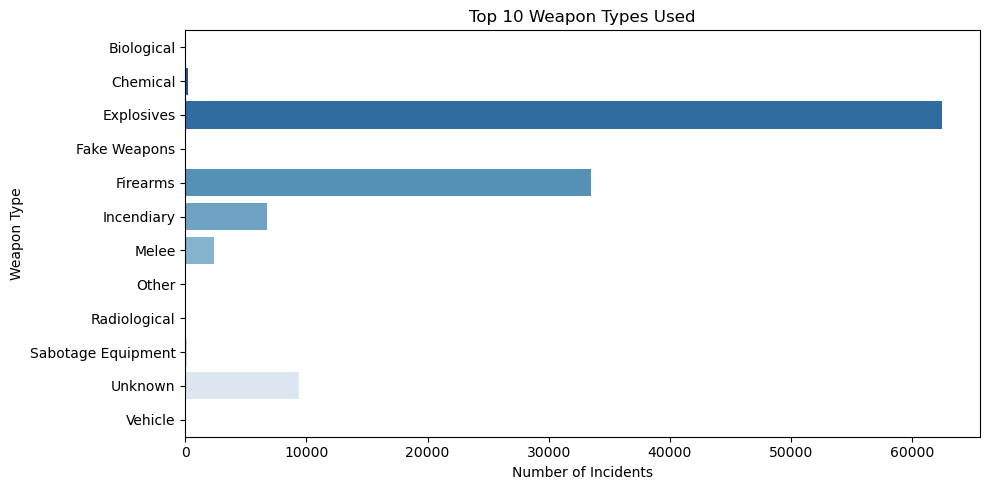

In [35]:
weapon_counts = df['weapon'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=weapon_counts.values, y=weapon_counts.index, palette='Blues_r')
plt.title("Top 10 Weapon Types Used")
plt.xlabel("Number of Incidents")
plt.ylabel("Weapon Type")
plt.tight_layout()
plt.show()

C:\Users\multi\AppData\Local\Temp\ipykernel_7492\2176846995.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heat_df = df.pivot_table(index='region', columns='target', values='nkill', aggfunc='sum', fill_value=0)


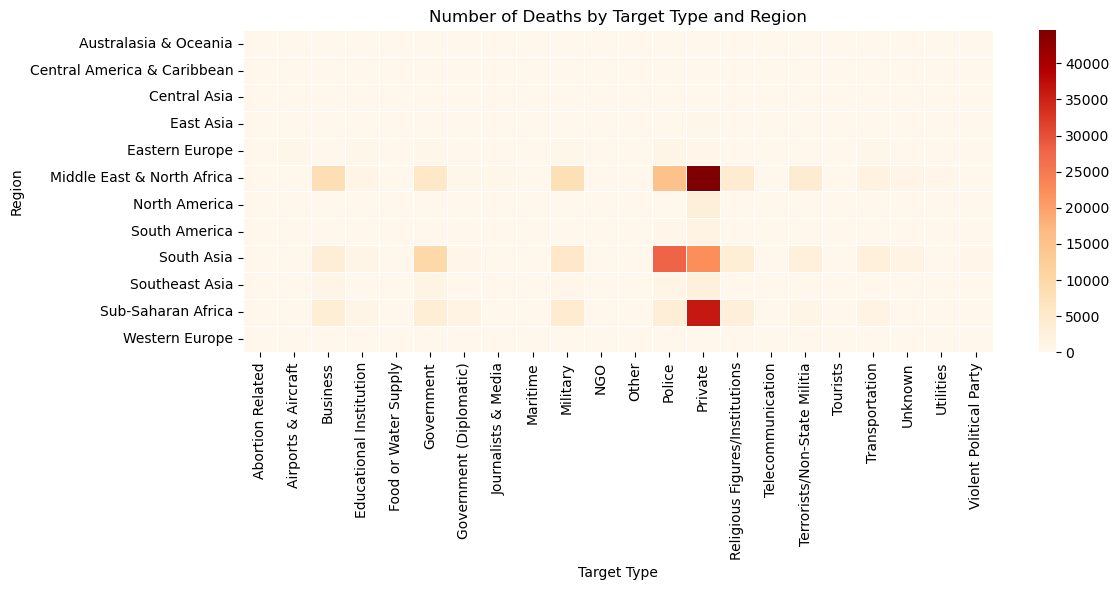

In [36]:
heat_df = df.pivot_table(index='region', columns='target', values='nkill', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heat_df, cmap='OrRd', linewidths=0.5)
plt.title("Number of Deaths by Target Type and Region")
plt.xlabel("Target Type")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

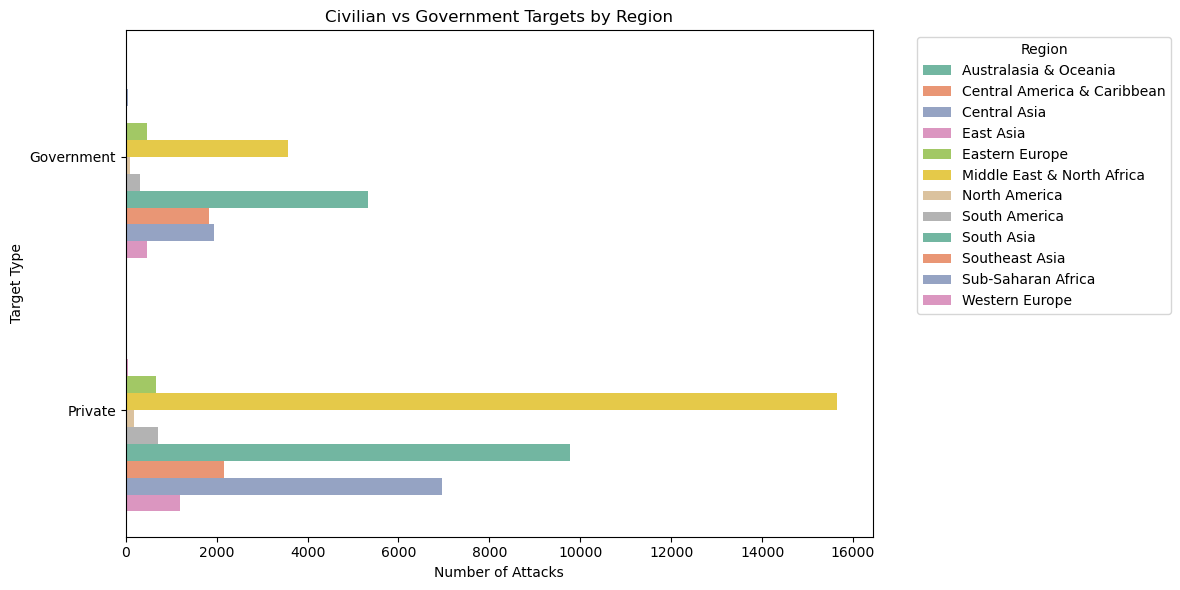

In [37]:
top_targets = ['Private', 'Government']
df_top_targets = df[df['target'].isin(top_targets)].copy()

df_top_targets['target'] = df_top_targets['target'].cat.remove_unused_categories()


plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_targets, y='target', hue='region', palette='Set2')

plt.title("Civilian vs Government Targets by Region")
plt.xlabel("Number of Attacks")
plt.ylabel("Target Type")
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [38]:
df_kz = df[df['country'] == 'Kazakhstan'].copy()


In [39]:
print(df_kz.shape)
df_kz.describe(include='all')
df_kz['year'].value_counts().sort_index()

(20, 22)


year
2000    1
2001    1
2008    1
2011    3
2012    4
2013    4
2016    3
2020    3
Name: count, dtype: int64

In [40]:
print(df_kz['attack'].value_counts())
print(df_kz['target'].value_counts())
print(df_kz['weapon'].value_counts())

attack
Explosion                6
Infrastructure Attack    6
Armed Assault            5
Assassination            1
Hijacking                1
Unarmed Assault          1
Hostage (Barricade)      0
Hostage (Kidnapping)     0
Unknown                  0
Name: count, dtype: int64
target
Government                        5
Police                            3
Business                          2
Educational Institution           2
Journalists & Media               2
Private                           2
Government (Diplomatic)           1
Unknown                           1
Military                          1
Transportation                    1
Abortion Related                  0
Telecommunication                 0
Utilities                         0
Tourists                          0
Terrorists/Non-State Militia      0
Other                             0
Religious Figures/Institutions    0
Airports & Aircraft               0
NGO                               0
Maritime                         

C:\Users\multi\AppData\Local\Temp\ipykernel_7492\19019348.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_kz, x='year', palette='viridis')


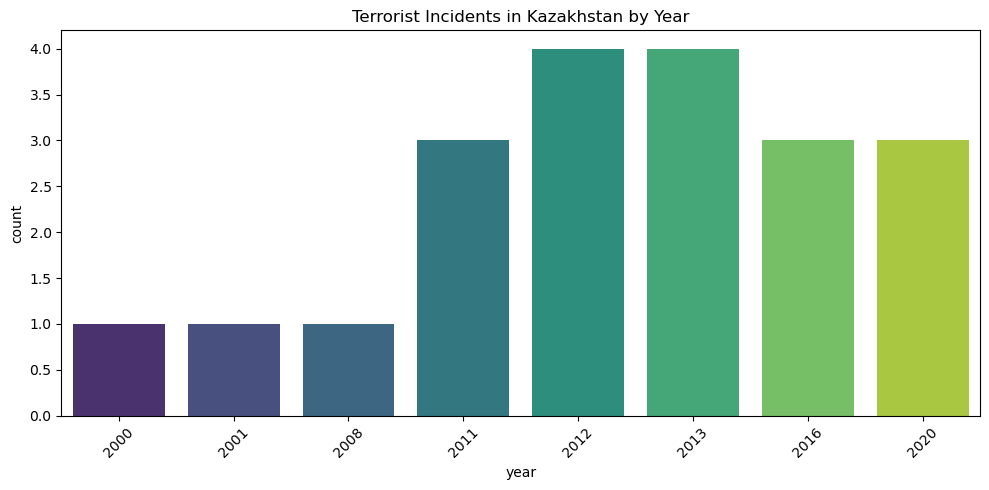

In [41]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_kz, x='year', palette='viridis')
plt.title("Terrorist Incidents in Kazakhstan by Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\multi\AppData\Local\Temp\ipykernel_7492\2402454112.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_kz, y='attack', palette='magma')


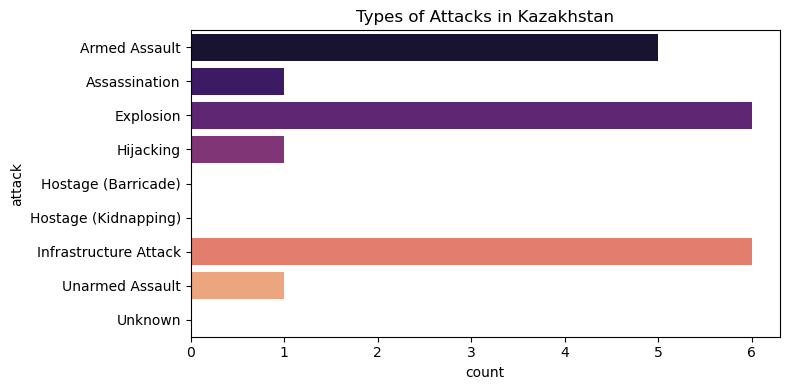

In [42]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_kz, y='attack', palette='magma')
plt.title("Types of Attacks in Kazakhstan")
plt.tight_layout()
plt.show()

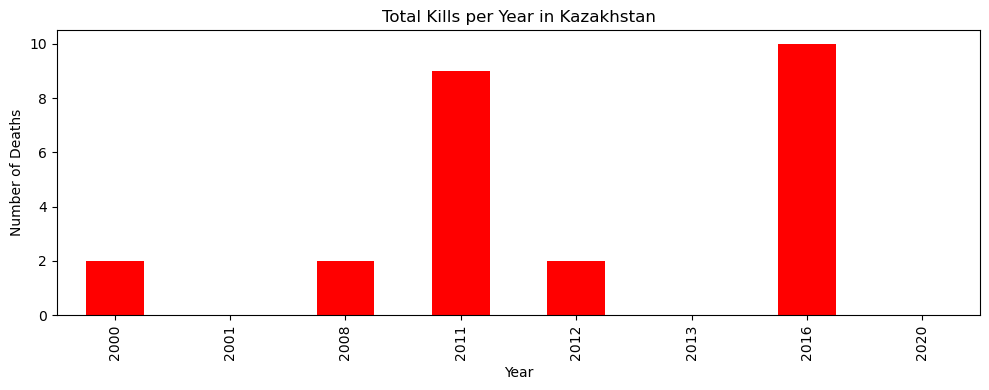

In [43]:
df_kz.groupby('year')['nkill'].sum().plot(kind='bar', figsize=(10, 4), color='red')
plt.title("Total Kills per Year in Kazakhstan")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.tight_layout()
plt.show()

In [44]:
df_kz['target'].value_counts()



target
Government                        5
Police                            3
Business                          2
Educational Institution           2
Journalists & Media               2
Private                           2
Government (Diplomatic)           1
Unknown                           1
Military                          1
Transportation                    1
Abortion Related                  0
Telecommunication                 0
Utilities                         0
Tourists                          0
Terrorists/Non-State Militia      0
Other                             0
Religious Figures/Institutions    0
Airports & Aircraft               0
NGO                               0
Maritime                          0
Food or Water Supply              0
Violent Political Party           0
Name: count, dtype: int64